In [132]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

In [133]:
# df = pd.read_excel('./sp-500-pe-ratio-price-to-earnings-chart.xlsx')

# sensex=yf.Ticker('^BSESN')
# sensex_data = sensex.history(period='max')

# # Convert the data to a CSV file
# sensex_data.to_csv('sensex_data.csv')


In [152]:
df = pd.read_csv('sensex_data_corrected.csv')
df_vals = df.iloc[1:,[0,4]]

df_vals




,Unnamed: 0,Close
1,1997-07-02,4333.899902
2,1997-07-03,4323.459961
3,1997-07-04,4323.819824
4,1997-07-07,4291.450195
5,1997-07-08,4306.390137
...,...,...
6555,2024-02-09,71595.492190
6556,2024-02-12,71072.492190
6557,2024-02-13,71555.187500
6558,2024-02-14,71822.828130


In [153]:

# Convert the 'Date' column to datetime format with specific format

df_vals=df_vals.set_index(df_vals.columns[0])




df_vals

,Close
Unnamed: 0,
1997-07-02,4333.899902
1997-07-03,4323.459961
1997-07-04,4323.819824
1997-07-07,4291.450195
1997-07-08,4306.390137
...,...
2024-02-09,71595.492190
2024-02-12,71072.492190
2024-02-13,71555.187500


In [154]:
df_yr = df_vals.loc[:]
df_yr

,Close
Unnamed: 0,
1997-07-02,4333.899902
1997-07-03,4323.459961
1997-07-04,4323.819824
1997-07-07,4291.450195
1997-07-08,4306.390137
...,...
2024-02-09,71595.492190
2024-02-12,71072.492190
2024-02-13,71555.187500


In [155]:
df_yr_mean = df_vals.rolling(window = 120).mean()
df_yr_mean

,Close
Unnamed: 0,
1997-07-02,NaN
1997-07-03,NaN
1997-07-04,NaN
1997-07-07,NaN
1997-07-08,NaN
...,...
2024-02-09,67800.532651
2024-02-12,67847.787403
2024-02-13,67897.918783


<Axes: xlabel='Unnamed: 0'>

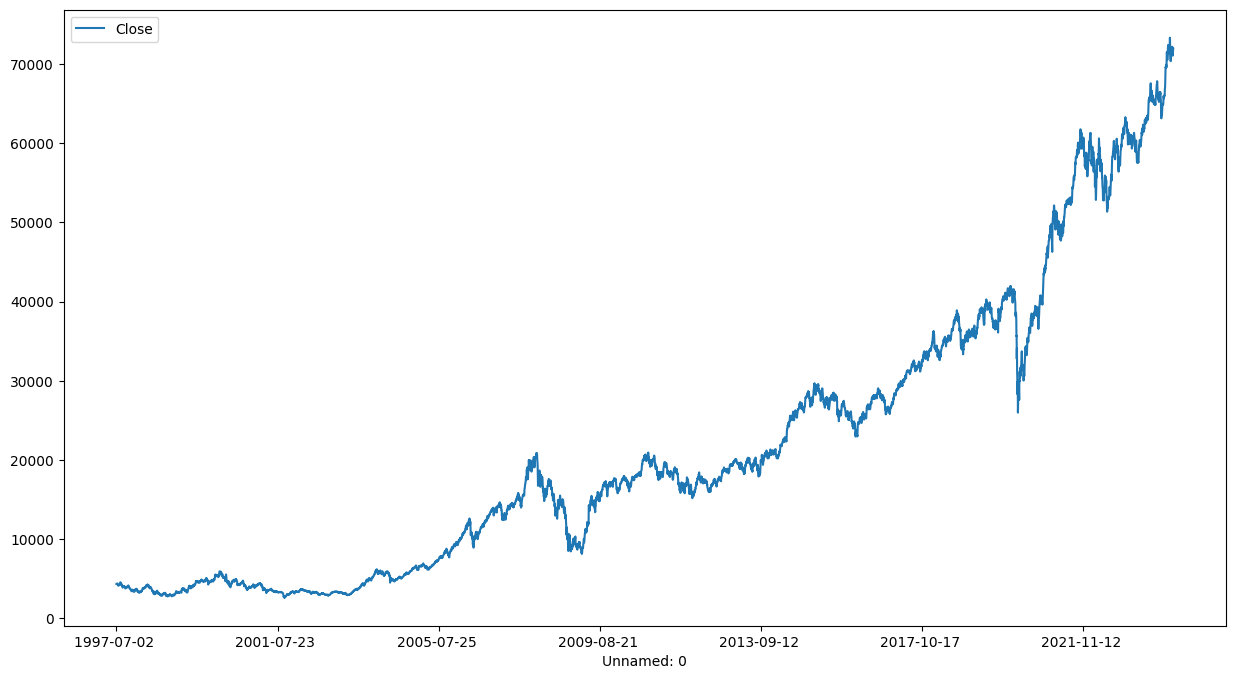

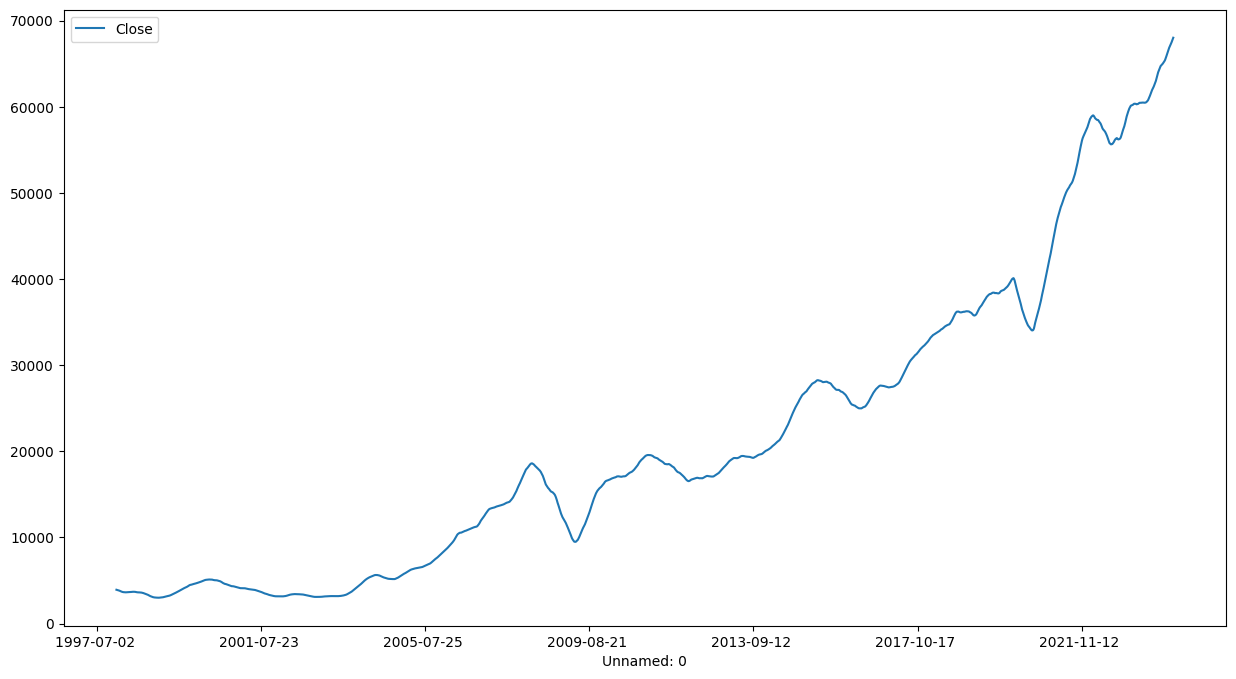

In [156]:
df_vals.plot(figsize=(15,8))
df_yr_mean.plot(figsize=(15,8))

In [157]:
df_vals['moving_skewness'] = df_vals[df_vals.columns[0]].rolling(window=60).apply(lambda x: skew(x, nan_policy='omit'))

In [158]:
df_vals

,Close,moving_skewness
Unnamed: 0,,
1997-07-02,4333.899902,NaN
1997-07-03,4323.459961,NaN
1997-07-04,4323.819824,NaN
1997-07-07,4291.450195,NaN
1997-07-08,4306.390137,NaN
...,...,...
2024-02-09,71595.492190,-0.909743
2024-02-12,71072.492190,-0.971272
2024-02-13,71555.187500,-1.030214


Text(0, 0.5, 'Moving Skewness')

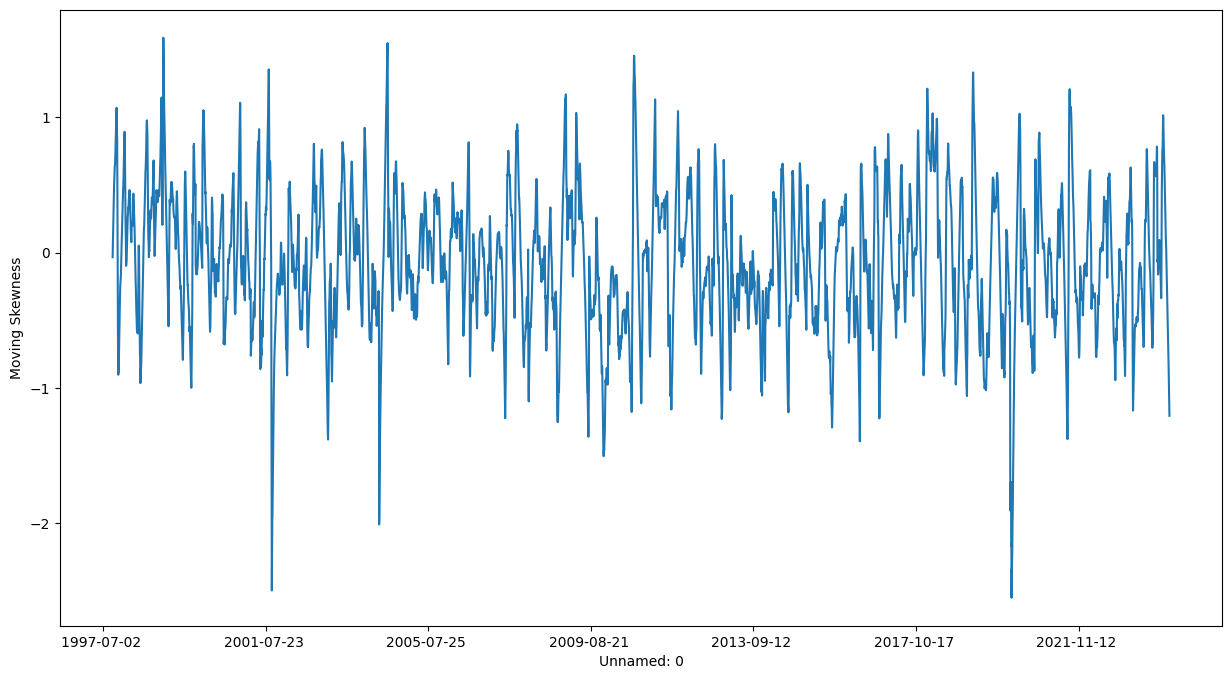

In [159]:
df_vals['moving_skewness'].plot(figsize=(15,8))
plt.ylabel('Moving Skewness')

In [160]:
df_vals['moving_kurtosis'] = df_vals['Close'].rolling(window=60).apply(lambda x: kurtosis(x, nan_policy='omit'))
df_vals['moving_excess_kurtosis'] = df_vals['moving_kurtosis'] - 3  # Excess kurtosis is kurtosis - 3

Text(0, 0.5, 'Moving Kurtosis')

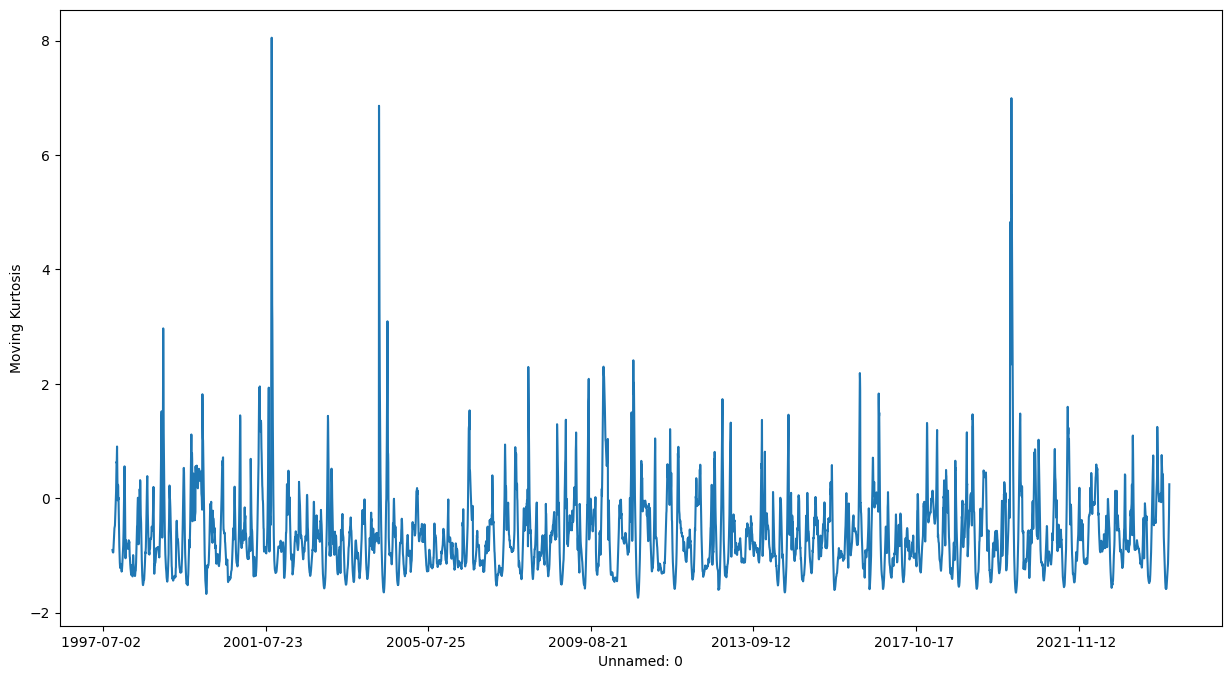

In [161]:
df_vals['moving_kurtosis'].plot(figsize=(15,8))
plt.ylabel('Moving Kurtosis')

Text(0, 0.5, 'Moving Excess Kurtosis')

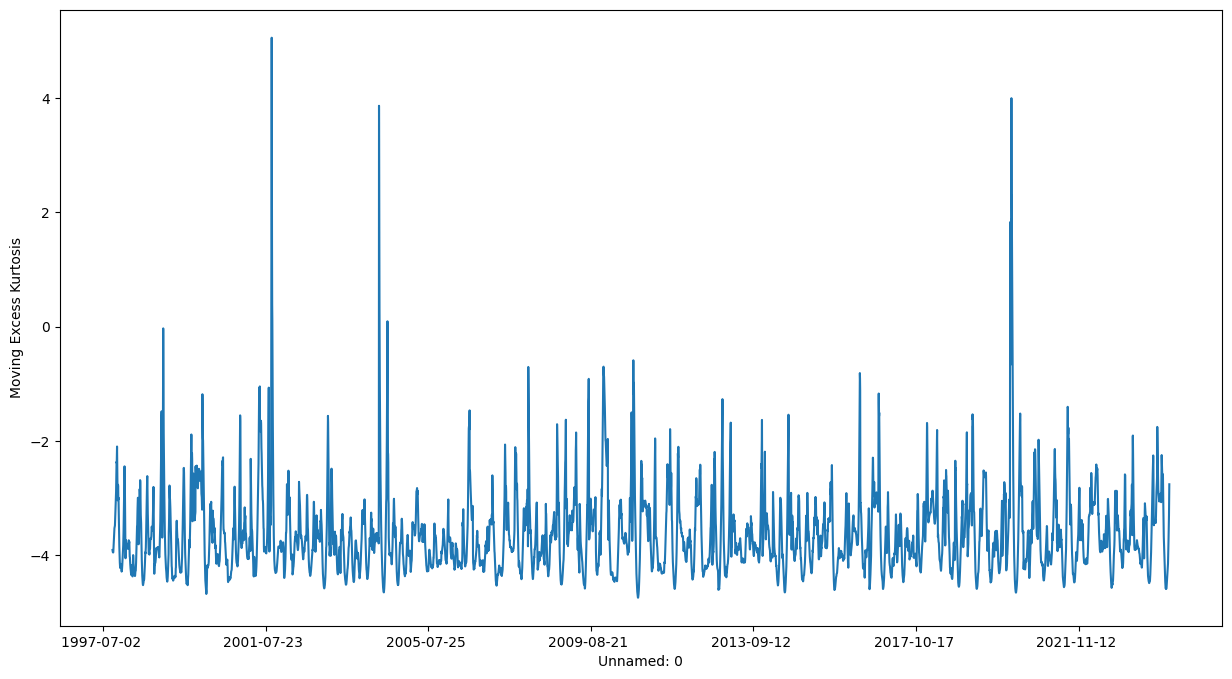

In [162]:
df_vals['moving_excess_kurtosis'].plot(figsize=(15,8))
plt.ylabel('Moving Excess Kurtosis')